## 1) Imports and Preprocessing.

In [ ]:
import pandas as pd
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("author_label_data.csv")
df.isnull().any().any() # False means no null values.

False

In [ ]:
print(df.head())
df.describe()

         Reviewer Name  Review Count  ...  Extreme Ratio  Reliability Score
0              Matt  F             3  ...       0.666667               0.30
1           Julie  Ann             6  ...       0.666667               0.75
2       Angie  Targett             3  ...       0.666667               0.55
3    Jessica  Draghici             6  ...       0.000000               0.85
4  Jeanette  Laliberty             3  ...       1.000000               0.15

[5 rows x 26 columns]


,Review Count,average_descriptive_words,average_action_words,liked_reviews,average_self_reference,average_emotional_words,average_negation_words,high_sentiment_count,low_sentiment_count,lexical_max,lexical_min,lexical_mean,%High Rating,%Low Rating,WC Max,WC Min,WC Median,WC Mean,Total Low Quality Words,Quality Word Percentage,Bodyless Ratio,High Ratio,Low Ratio,Extreme Ratio,Reliability Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000
mean,8.056000,0.122755,0.046773,0.636000,0.006722,0.008275,0.009933,1.267000,0.073000,0.940610,0.367504,0.579414,76.113882,8.711104,33.601000,4.925000,10.658000,13.497336,0.021000,0.339315,0.0,0.458454,0.047264,0.505718,0.351520
std,7.524858,0.117322,0.051156,1.837629,0.016810,0.030314,0.023374,1.771115,0.285924,0.183024,0.425089,0.348591,26.021912,17.150453,44.069399,14.282555,23.571023,23.815952,0.150272,0.571205,0.0,0.336600,0.131853,0.334214,0.233589
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.010000
25%,3.000000,0.038462,0.004868,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.221955,60.000000,0.000000,8.000000,0.000000,0.000000,2.181818,0.000000,0.000000,0.0,0.166667,0.000000,0.250000,0.150000
50%,5.000000,0.095997,0.031498,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.661293,83.333333,0.000000,19.000000,0.000000,3.500000,6.000000,0.000000,0.142857,0.0,0.468627,0.000000,0.500000,0.300000
75%,11.000000,0.169573,0.072917,1.000000,0.006221,0.004462,0.011174,2.000000,0.000000,1.000000,0.818860,0.928800,100.000000,11.111111,42.000000,4.000000,11.500000,15.541667,0.000000,0.500000,0.0,0.714286,0.000000,0.750000,0.500000
max,51.000000,1.000000,0.500000,42.000000,0.250000,0.500000,0.333333,22.000000,3.000000,1.000000,1.000000,1.000000,100.000000,100.000000,382.000000,240.000000,266.500000,266.500000,2.000000,5.500000,0.0,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Converting multiclass problem into binary problem.
def func(score):
  if score >= 0 and score <= 0.25:
    return 0
  elif score >= 0.25 and score <= 1:
    return 1

In [ ]:
df['Class'] = df.apply(lambda x: func(x['Reliability Score']), axis = 1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


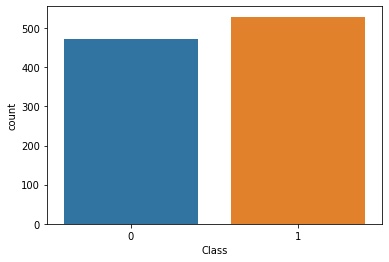

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'Class', data = df)

In [ ]:
print(df.shape)
df.head()

(1000, 17)


,ID,Reviewer Name,Review Count,%High Rating,%Low Rating,WC Max,WC Min,WC Median,WC Mean,Total Low Quality Words,Quality Word Percentage,Bodyless Ratio,High Ratio,Low Ratio,Extreme Ratio,Reliability Score,Class
0,0,Matt F,3,100.000000,0.0,7,5,7.0,6.333333,0,0.333333,0.0,0.666667,0.000000,0.666667,0.30,1
1,10,Julie Ann,6,50.000000,50.0,105,3,6.5,29.000000,0,1.000000,0.0,0.500000,0.166667,0.666667,0.75,1
2,11,Angie Targett,3,66.666667,0.0,44,9,28.0,27.000000,0,0.333333,0.0,0.666667,0.000000,0.666667,0.55,1
3,15,Jessica Draghici,6,83.333333,0.0,22,5,8.5,10.833333,0,0.000000,0.0,0.000000,0.000000,0.000000,0.85,1
4,117,Jeanette Laliberty,3,100.000000,0.0,11,4,7.0,7.333333,0,0.333333,0.0,1.000000,0.000000,1.000000,0.15,0


In [ ]:
y = df['Class']
X = df.drop(columns=['ID', 'Reviewer Name', 'Class', 'Reliability Score'])
X.shape

(1000, 13)

In [ ]:
# Splitting data into training and testing data.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
# Performing PCA on data.

from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca_train = pca.fit_transform(X_train)

Text(0.5, 0, 'Principal components')

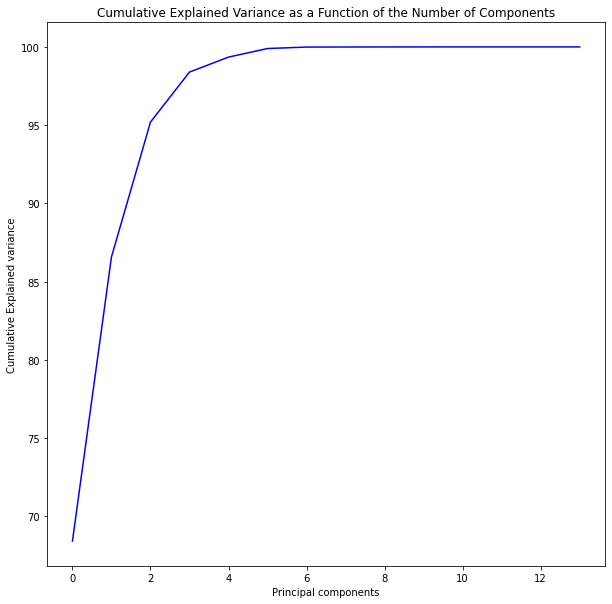

In [ ]:
# Plotting cumulative variance as a function of number of prinicipal componenets.

cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'blue',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')

In [ ]:
print(cumsum[4], cumsum[5], cumsum[6])

99.34820310564851 99.89665769183972 99.99020802551959


## 2) SVM with RBF Kernel on input data.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

c = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

for i in c:
  clf = SVC(C = i, random_state = 42)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  score = accuracy_score(y_test, y_pred)
  print("For C = ", i, ", Accuracy is = ", score)
  print("\n\n")

For C =  0.01 , Accuracy is =  0.58



For C =  0.05 , Accuracy is =  0.6733333333333333



For C =  0.1 , Accuracy is =  0.68



For C =  0.5 , Accuracy is =  0.7



For C =  1 , Accuracy is =  0.74



For C =  2 , Accuracy is =  0.7333333333333333



For C =  5 , Accuracy is =  0.7266666666666667



For C =  10 , Accuracy is =  0.7333333333333333



For C =  20 , Accuracy is =  0.7533333333333333



For C =  50 , Accuracy is =  0.7666666666666667



For C =  100 , Accuracy is =  0.76



For C =  200 , Accuracy is =  0.76



For C =  500 , Accuracy is =  0.7733333333333333



For C =  1000 , Accuracy is =  0.8





In [ ]:
# from sklearn.svm import SVC
# clf = SVC(C = 0.5, random_state = 42, kernel = 'linear')
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# X_test

In [ ]:
# y_pred
# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test, y_pred))

## 3) SVM with Linear Kernel on input data.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

c = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500]

for i in c:
  clf = SVC(C = i, random_state = 42, kernel = 'linear')
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  score = accuracy_score(y_test, y_pred)
  print("For C = ", i, ", Accuracy is = ", score)
  print("\n\n")

For C =  0.01 , Accuracy is =  0.7133333333333334



For C =  0.05 , Accuracy is =  0.7466666666666667



For C =  0.1 , Accuracy is =  0.7533333333333333



For C =  0.5 , Accuracy is =  0.7533333333333333



For C =  1 , Accuracy is =  0.7533333333333333



For C =  2 , Accuracy is =  0.7533333333333333



For C =  5 , Accuracy is =  0.7533333333333333



For C =  10 , Accuracy is =  0.7533333333333333



For C =  20 , Accuracy is =  0.7533333333333333



For C =  50 , Accuracy is =  0.76



For C =  100 , Accuracy is =  0.7666666666666667



For C =  200 , Accuracy is =  0.7666666666666667



For C =  500 , Accuracy is =  0.78





## 4) SVM with RBF Kernel on PCA modified data.

In [ ]:
pca = PCA(n_components = 6, random_state = 42)
X_1 = pca.fit_transform(X_train)
X_2 = pca.transform(X_test)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

c = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500]

for i in c:
  clf = SVC(C = i, random_state = 42)
  clf.fit(X_1, y_train)
  y_pred = clf.predict(X_2)
  score = accuracy_score(y_test, y_pred)
  print("For C = ", i, ", Accuracy is = ", score)
  print("\n\n")

For C =  0.01 , Accuracy is =  0.7533333333333333



For C =  0.05 , Accuracy is =  0.6933333333333334



For C =  0.1 , Accuracy is =  0.7066666666666667



For C =  0.5 , Accuracy is =  0.7333333333333333



For C =  1 , Accuracy is =  0.7333333333333333



For C =  2 , Accuracy is =  0.7333333333333333



For C =  5 , Accuracy is =  0.7466666666666667



For C =  10 , Accuracy is =  0.7666666666666667



For C =  20 , Accuracy is =  0.7733333333333333



For C =  50 , Accuracy is =  0.7733333333333333



For C =  100 , Accuracy is =  0.78



For C =  200 , Accuracy is =  0.78



For C =  500 , Accuracy is =  0.7666666666666667





## 5) SVM with Linear Kernel on PCA modified data.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

c = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500]

for i in c:
  clf = SVC(C = i, random_state = 42, kernel = 'linear')
  clf.fit(X_1, y_train)
  y_pred = clf.predict(X_2)
  score = accuracy_score(y_test, y_pred)
  print("For C = ", i, ", Accuracy is = ", score)
  print("\n\n")

For C =  0.01 , Accuracy is =  0.7266666666666667



For C =  0.05 , Accuracy is =  0.7266666666666667



For C =  0.1 , Accuracy is =  0.7266666666666667



For C =  0.5 , Accuracy is =  0.7266666666666667



For C =  1 , Accuracy is =  0.7266666666666667



For C =  2 , Accuracy is =  0.7266666666666667



For C =  5 , Accuracy is =  0.7266666666666667



For C =  10 , Accuracy is =  0.7266666666666667



For C =  20 , Accuracy is =  0.7266666666666667



For C =  50 , Accuracy is =  0.7266666666666667



For C =  100 , Accuracy is =  0.7266666666666667



For C =  200 , Accuracy is =  0.7266666666666667



For C =  500 , Accuracy is =  0.7333333333333333





## 6) Save the final model as a pickle object which can be loaded later to make predictions.

In [ ]:
clf = SVC(C = 1000, random_state = 42)
clf.fit(X_train, y_train)

In [ ]:
import cPickle
# Save the classifier.
with open('binary_classifier.pkl', 'wb') as fid:
    cPickle.dump(clf, fid) 

# Classifier will be saved as 'binary_classifier.pkl' in the folder where the notebook exists.